In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as go
import holidays
import seaborn as sns

In [3]:
energy = []
folder_path = "../src/data/raw"

for file_name in sorted(os.listdir(folder_path)):
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, file_name))
        energy.append(df)

energy = pd.concat(energy, axis=0, ignore_index=True)
energy["SETTLEMENTDATE"] = pd.to_datetime(energy["SETTLEMENTDATE"])
energy.drop(columns=["REGION", "PERIODTYPE"], inplace=True)
energy["Weekday"] = energy["SETTLEMENTDATE"].dt.day_name()

# Add public holidays
vic_holidays = holidays.Australia(years=range(2018, 2024), state="VIC")
energy["Holiday"] = energy["SETTLEMENTDATE"].dt.date.map(lambda x: x in vic_holidays)
energy["Holiday"] = energy["Holiday"].fillna(False)

In [4]:
energy.describe(include='all')

,SETTLEMENTDATE,TOTALDEMAND,RRP,Weekday,Holiday
count,293808,293808.000000,293808.000000,293808,293808
unique,NaN,NaN,NaN,7,2
top,NaN,NaN,NaN,Friday,False
freq,NaN,NaN,NaN,42192,281328
mean,2022-03-08 20:12:58.843326720,4714.790994,85.821839,NaN,NaN
min,2018-01-01 00:30:00,1456.400000,-1000.000000,NaN,NaN
25%,2021-10-27 21:03:45,4076.587500,12.880000,NaN,NaN
50%,2022-07-09 22:02:30,4605.605000,63.740000,NaN,NaN
75%,2023-03-21 23:01:15,5265.530000,117.550000,NaN,NaN
max,2024-01-01 00:00:00,9507.260000,15100.000000,NaN,NaN


In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293808 entries, 0 to 293807
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SETTLEMENTDATE  293808 non-null  datetime64[ns]
 1   TOTALDEMAND     293808 non-null  float64       
 2   RRP             293808 non-null  float64       
 3   Weekday         293808 non-null  object        
 4   Holiday         293808 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(1)
memory usage: 9.2+ MB


In [6]:
energy

,SETTLEMENTDATE,TOTALDEMAND,RRP,Weekday,Holiday
0,2018-01-01 00:30:00,4251.18,92.46,Monday,True
1,2018-01-01 01:00:00,4092.53,87.62,Monday,True
2,2018-01-01 01:30:00,3958.95,73.08,Monday,True
3,2018-01-01 02:00:00,3785.27,70.18,Monday,True
4,2018-01-01 02:30:00,3673.72,67.43,Monday,True
...,...,...,...,...,...
293803,2023-12-31 23:40:00,4070.49,51.94,Sunday,False
293804,2023-12-31 23:45:00,4035.14,52.23,Sunday,False
293805,2023-12-31 23:50:00,4039.52,51.83,Sunday,False
293806,2023-12-31 23:55:00,4036.91,51.43,Sunday,False


In [25]:
# output_path = "D:/GitHub_Web/energy/src/data/processed/combined_data.csv"
# energy.to_csv(output_path, index=False)

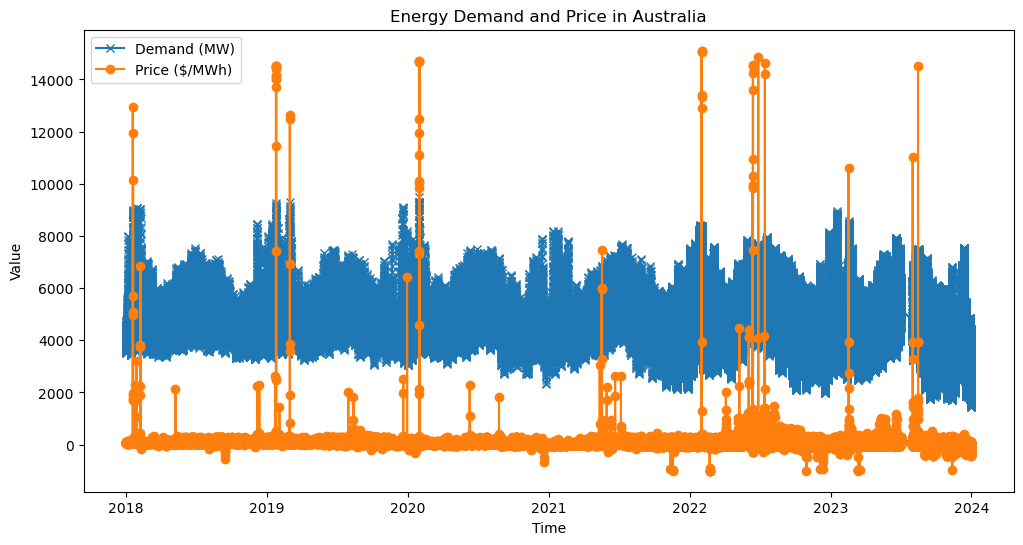

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(energy.SETTLEMENTDATE, energy.TOTALDEMAND, label = "Demand (MW)", marker='x')
plt.plot(energy.SETTLEMENTDATE, energy.RRP, label = "Price ($/MWh)", marker='o')

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Energy Demand and Price in Australia")
plt.legend()
plt.show()

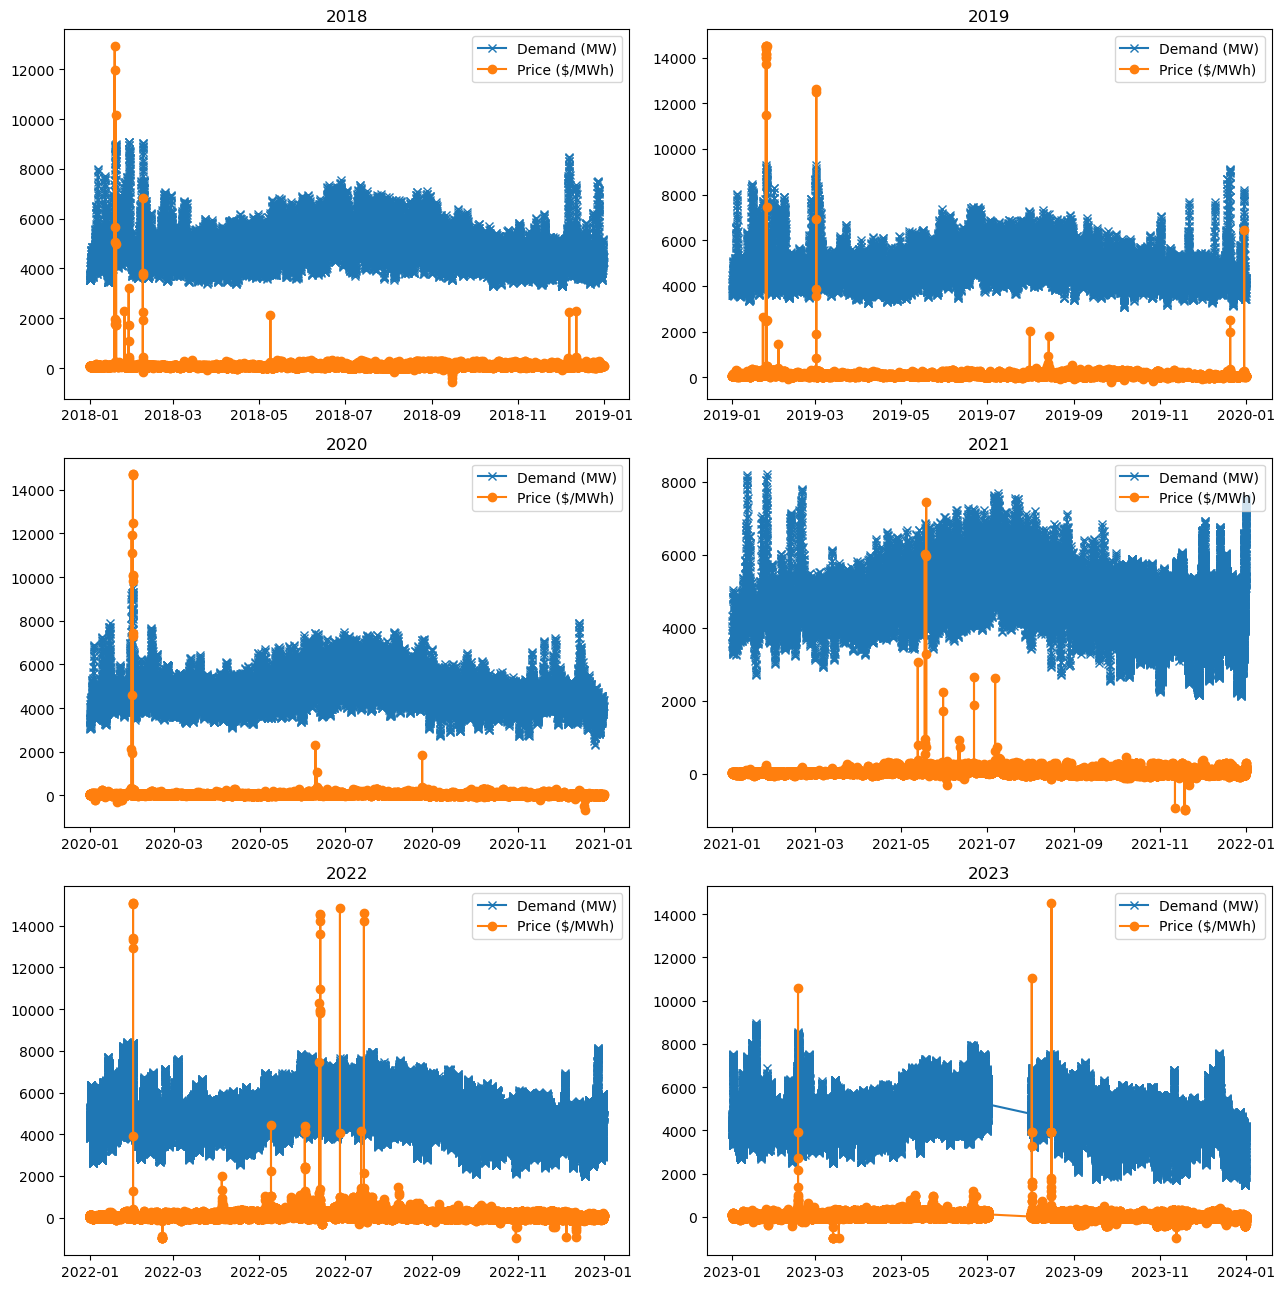

In [8]:
energy_2018 = energy[energy["SETTLEMENTDATE"].dt.year == 2018]
energy_2019 = energy[energy["SETTLEMENTDATE"].dt.year == 2019]
energy_2020 = energy[energy["SETTLEMENTDATE"].dt.year == 2020]
energy_2021 = energy[energy["SETTLEMENTDATE"].dt.year == 2021]
energy_2022 = energy[energy["SETTLEMENTDATE"].dt.year == 2022]
energy_2023 = energy[energy["SETTLEMENTDATE"].dt.year == 2023]

fig, ax = plt.subplots(3, 2, figsize=(13, 13))
ax[0,0].plot(energy_2018.SETTLEMENTDATE, energy_2018.TOTALDEMAND, label = "Demand (MW)", marker='x')
ax[0,0].plot(energy_2018.SETTLEMENTDATE, energy_2018.RRP, label = "Price ($/MWh)", marker='o')
ax[0,0].set_title("2018")
ax[0,0].legend()

ax[0,1].plot(energy_2019.SETTLEMENTDATE, energy_2019.TOTALDEMAND, label = "Demand (MW)", marker='x')
ax[0,1].plot(energy_2019.SETTLEMENTDATE, energy_2019.RRP, label = "Price ($/MWh)", marker='o')
ax[0,1].set_title("2019")
ax[0,1].legend()

ax[1,0].plot(energy_2020.SETTLEMENTDATE, energy_2020.TOTALDEMAND, label = "Demand (MW)", marker='x')
ax[1,0].plot(energy_2020.SETTLEMENTDATE, energy_2020.RRP, label = "Price ($/MWh)", marker='o')
ax[1,0].set_title("2020")
ax[1,0].legend()

ax[1,1].plot(energy_2021.SETTLEMENTDATE, energy_2021.TOTALDEMAND, label = "Demand (MW)", marker='x')
ax[1,1].plot(energy_2021.SETTLEMENTDATE, energy_2021.RRP, label = "Price ($/MWh)", marker='o')
ax[1,1].set_title("2021")
ax[1,1].legend()

ax[2,0].plot(energy_2022.SETTLEMENTDATE, energy_2022.TOTALDEMAND, label = "Demand (MW)", marker='x')
ax[2,0].plot(energy_2022.SETTLEMENTDATE, energy_2022.RRP, label = "Price ($/MWh)", marker='o')
ax[2,0].set_title("2022")
ax[2,0].legend()

ax[2,1].plot(energy_2023.SETTLEMENTDATE, energy_2023.TOTALDEMAND, label = "Demand (MW)", marker='x')
ax[2,1].plot(energy_2023.SETTLEMENTDATE, energy_2023.RRP, label = "Price ($/MWh)", marker='o')
ax[2,1].set_title("2023")
ax[2,1].legend()

plt.tight_layout()
plt.show()

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=energy_2018.SETTLEMENTDATE, y=energy_2018.TOTALDEMAND, mode='lines+markers', name='Demand (MW)'))
fig.add_trace(go.Scatter(x=energy_2018.SETTLEMENTDATE, y=energy_2018.RRP, mode='lines+markers', name='Price ($/MWh)'))

fig.update_layout(title='Energy Demand and Price in Australia - 2018',
                    width=1100, height=500,
                     xaxis_title='Time',
                     yaxis_title='Value')

fig.show()

In [22]:
energy_2018.loc[:, "Hour"] = energy_2018["SETTLEMENTDATE"].dt.hour
energy_2018.loc[:, "Minute"] = energy_2018["SETTLEMENTDATE"].dt.minute
energy_2018.loc[:, "Time"] = energy_2018["Hour"] + energy_2018["Minute"] / 60
energy_2018.loc[:, "Day"] = energy_2018["SETTLEMENTDATE"].dt.day
energy_2018.loc[:, "Month"] = energy_2018["SETTLEMENTDATE"].dt.month
energy_2018

,SETTLEMENTDATE,TOTALDEMAND,RRP,Weekday,Holiday,Hour,Minute,Time,Day,Month
0,2018-01-01 00:30:00,4251.18,92.46,Monday,True,0,30,0.5,1,1
1,2018-01-01 01:00:00,4092.53,87.62,Monday,True,1,0,1.0,1,1
2,2018-01-01 01:30:00,3958.95,73.08,Monday,True,1,30,1.5,1,1
3,2018-01-01 02:00:00,3785.27,70.18,Monday,True,2,0,2.0,1,1
4,2018-01-01 02:30:00,3673.72,67.43,Monday,True,2,30,2.5,1,1
...,...,...,...,...,...,...,...,...,...,...
17514,2018-12-31 21:30:00,4361.43,92.39,Monday,False,21,30,21.5,31,12
17515,2018-12-31 22:00:00,4292.49,79.39,Monday,False,22,0,22.0,31,12
17516,2018-12-31 22:30:00,4257.85,77.34,Monday,False,22,30,22.5,31,12
17517,2018-12-31 23:00:00,4247.55,78.95,Monday,False,23,0,23.0,31,12


# Time vs Weekday Heatmap

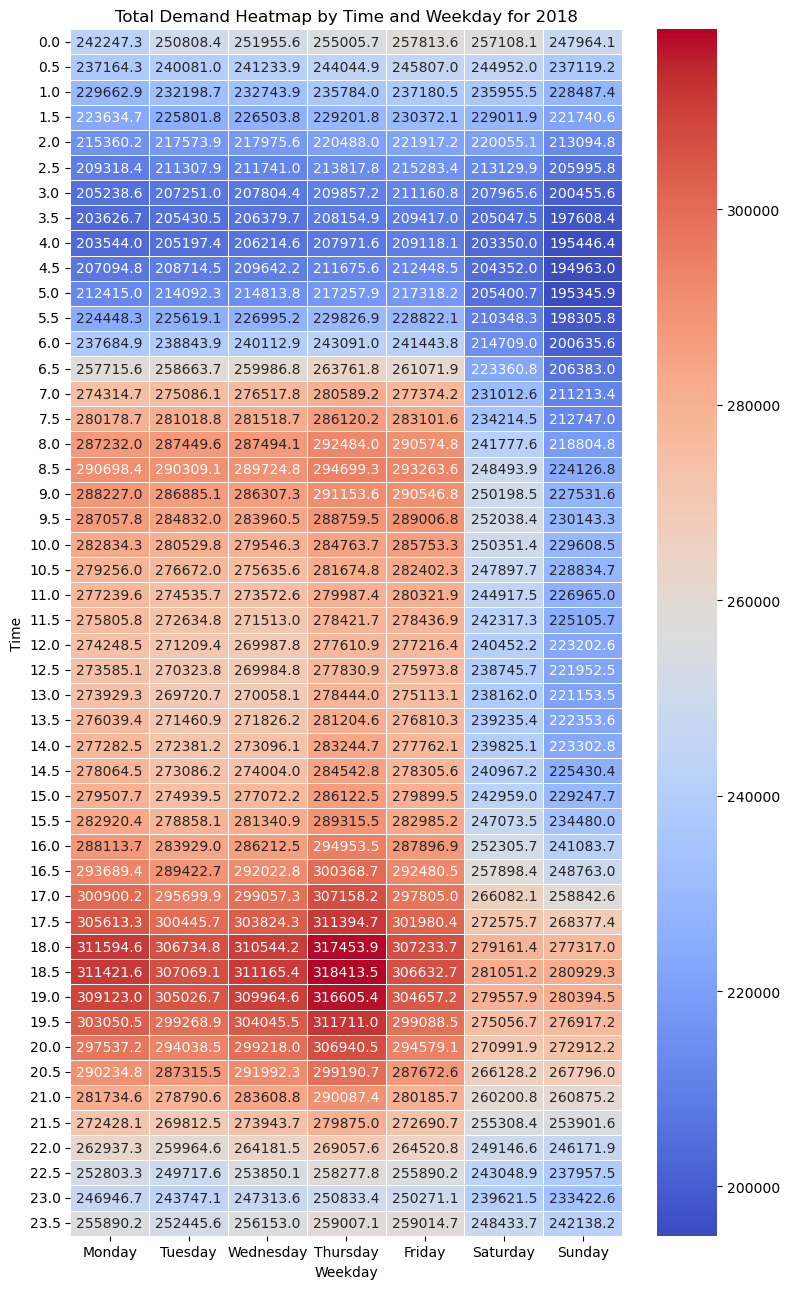

In [11]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tem = pd.crosstab(energy_2018.Time, energy_2018.Weekday, values=energy_2018.TOTALDEMAND, aggfunc='sum')
tem = tem.reindex(columns=week)

plt.figure(figsize=(8, 13))
sns.heatmap(tem, 
    annot=True, 
    fmt=".1f",
    linewidths=0.5,
    linecolor='white',
    cmap="coolwarm"
)
plt.xticks(rotation=0)
plt.title("Total Demand Heatmap by Time and Weekday for 2018")
plt.xlabel("Weekday")
plt.ylabel("Time")
plt.tight_layout()
plt.show()

- Lowest demand are from 2AM to 5AM, being the time where most people go to sleep.
- Highest demand are from 5PM to 8PM, being the sunset hours and the lights are coming on.
- Sat and Sun has the lowest demand in the week, being the weekend where offices are closed or operate at reduced capacity.
- Thurs has the highest demand in the week, Mon next, and possibly Weds.

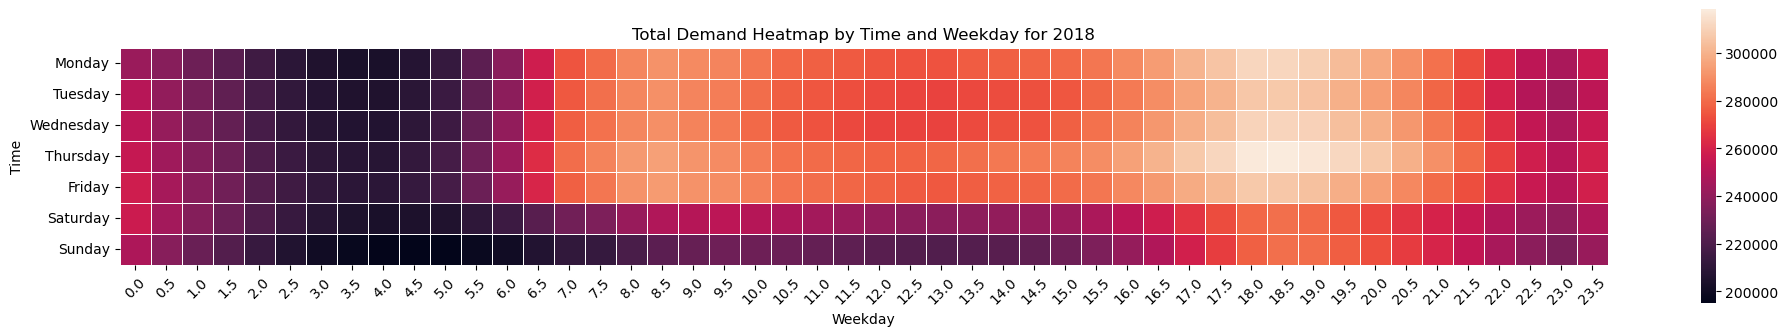

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(tem.T, 
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.2}
)
plt.xticks(rotation=45)
plt.title("Total Demand Heatmap by Time and Weekday for 2018")
plt.xlabel("Weekday")
plt.ylabel("Time")
plt.tight_layout()
plt.show()

- The dark patch is all over 2 till 5, with Sun and Mon being the darkest at those hours.
- Thurs is the shiniest from 6 till 7.

# Day vs Month Heatmap

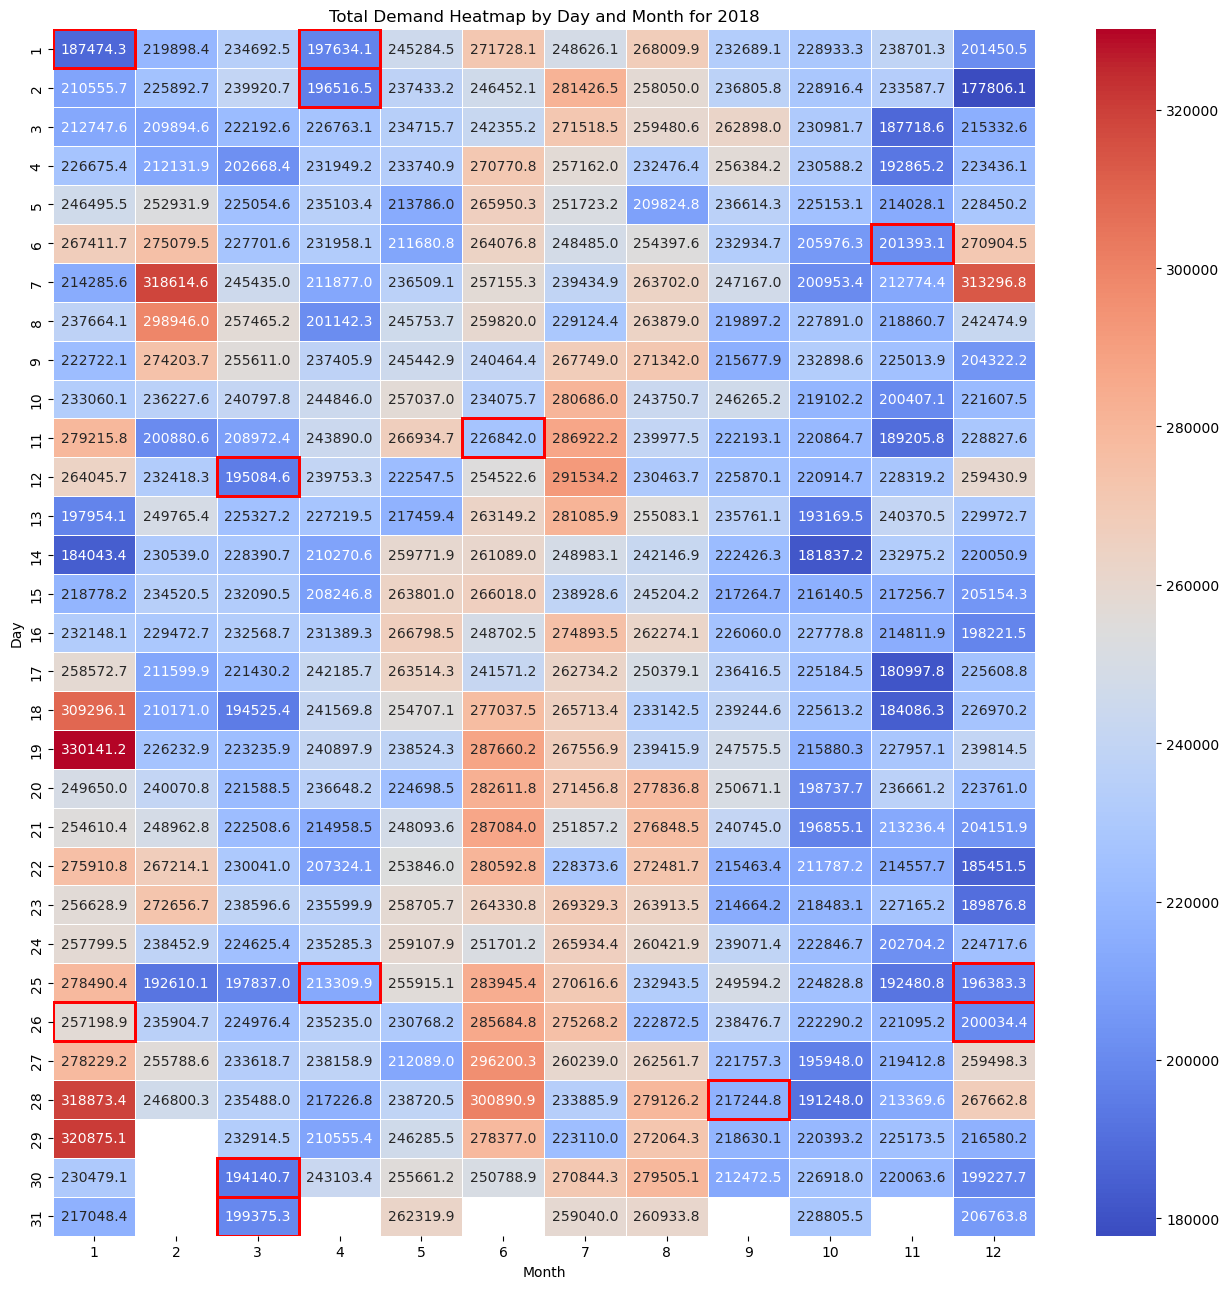

In [13]:
plt.figure(figsize=(13, 13))
sns.heatmap(pd.crosstab(energy_2018.Day, energy_2018.Month, values=energy_2018.TOTALDEMAND, aggfunc='sum'), 
    annot=True, 
    fmt=".1f",
    linewidths=0.5,
    linecolor='white',
    cmap="coolwarm"
)

ax = plt.gca()
holiday_data = energy_2018[energy_2018.Holiday == True]
for _, row in holiday_data.iterrows():
    rect = patches.Rectangle((row.Month-1, row.Day-1), 1, 1, 
                           fill=False, 
                           edgecolor='red',                                                                                                             
                           linewidth=2,
                           linestyle='-')
    ax.add_patch(rect)

plt.title("Total Demand Heatmap by Day and Month for 2018")
plt.xlabel("Month")
plt.ylabel("Day")
plt.tight_layout()
plt.show()

- All holidays are under the median of demand, some holidays are even among the lowest. This could be due to being the day where people hanging out with their friends and family and not occupiying in the house, bringing the electricity needs down.

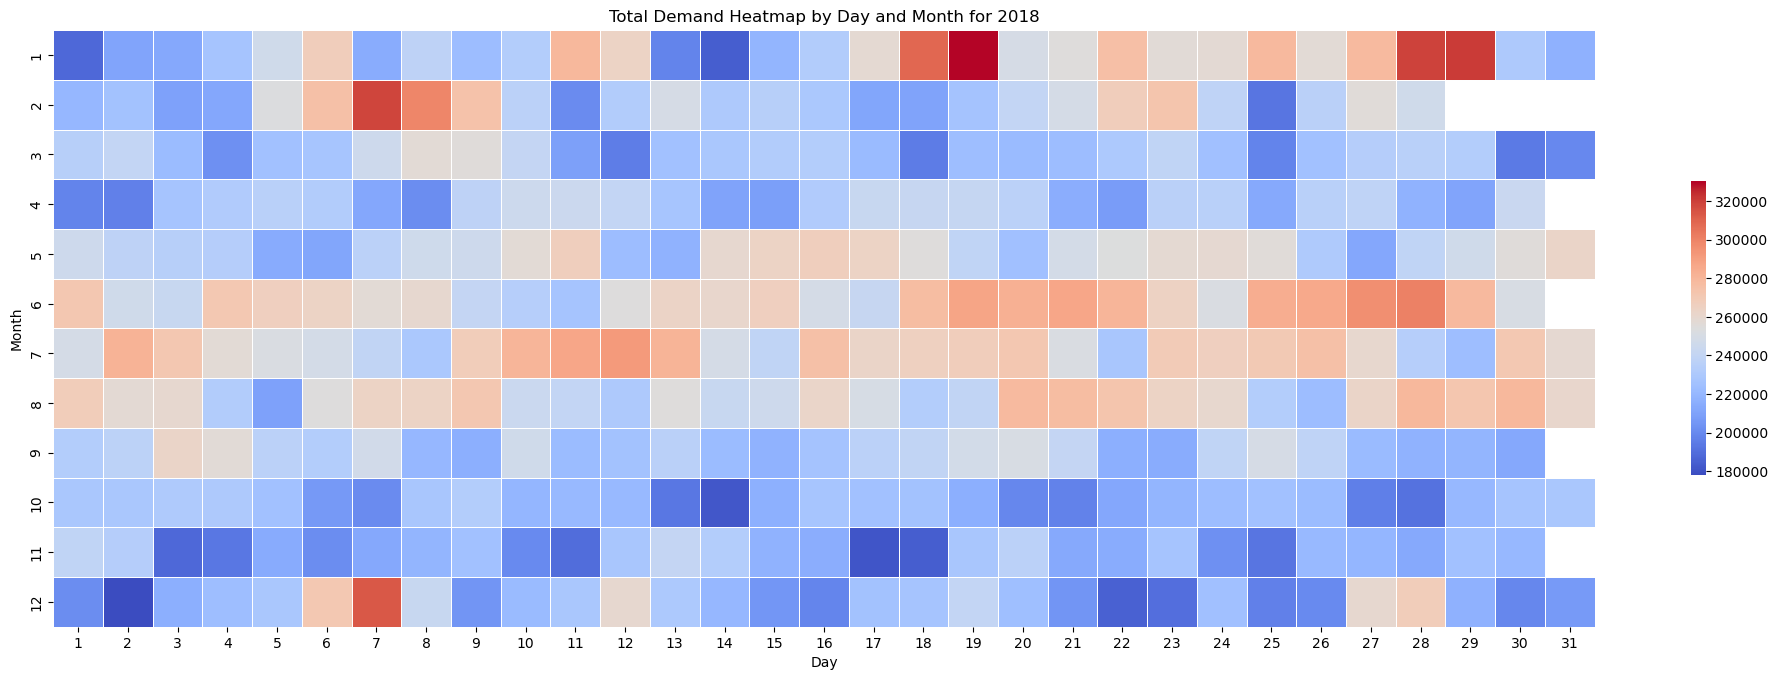

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(pd.crosstab(energy_2018.Day, energy_2018.Month, values=energy_2018.TOTALDEMAND, aggfunc='sum').T, 
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.2},
    cmap="coolwarm"
)

plt.title("Total Demand Heatmap by Day and Month for 2018")
plt.ylabel("Month")
plt.xlabel("Day")
plt.tight_layout()
plt.show()

- High demand on weekday from around July 14th to the end of August. This period is mid-winter in Australia, leading to increased energy usage for heating.
- Low demand on weekend from October 13th onward. October marks mid-spring, with milder temperatures reducing the need for heating or cooling.
- An influx of demand from January 17th to 29th. This is due to heatwave, especially on 19th with 41 degrees C, 28th - 38 degrees C, and 29th - 32 degrees C. Extreme temperatures during this period have placed additional stress on the grid as residential, commercial, and industrial sectors rely heavily on cooling.
- Some of the highest demand days (colored by red patches) are highly related to the heatwave as peak summer period is around those time.

Text(0.5, 1.0, 'Total Demand by Hour for 2018')

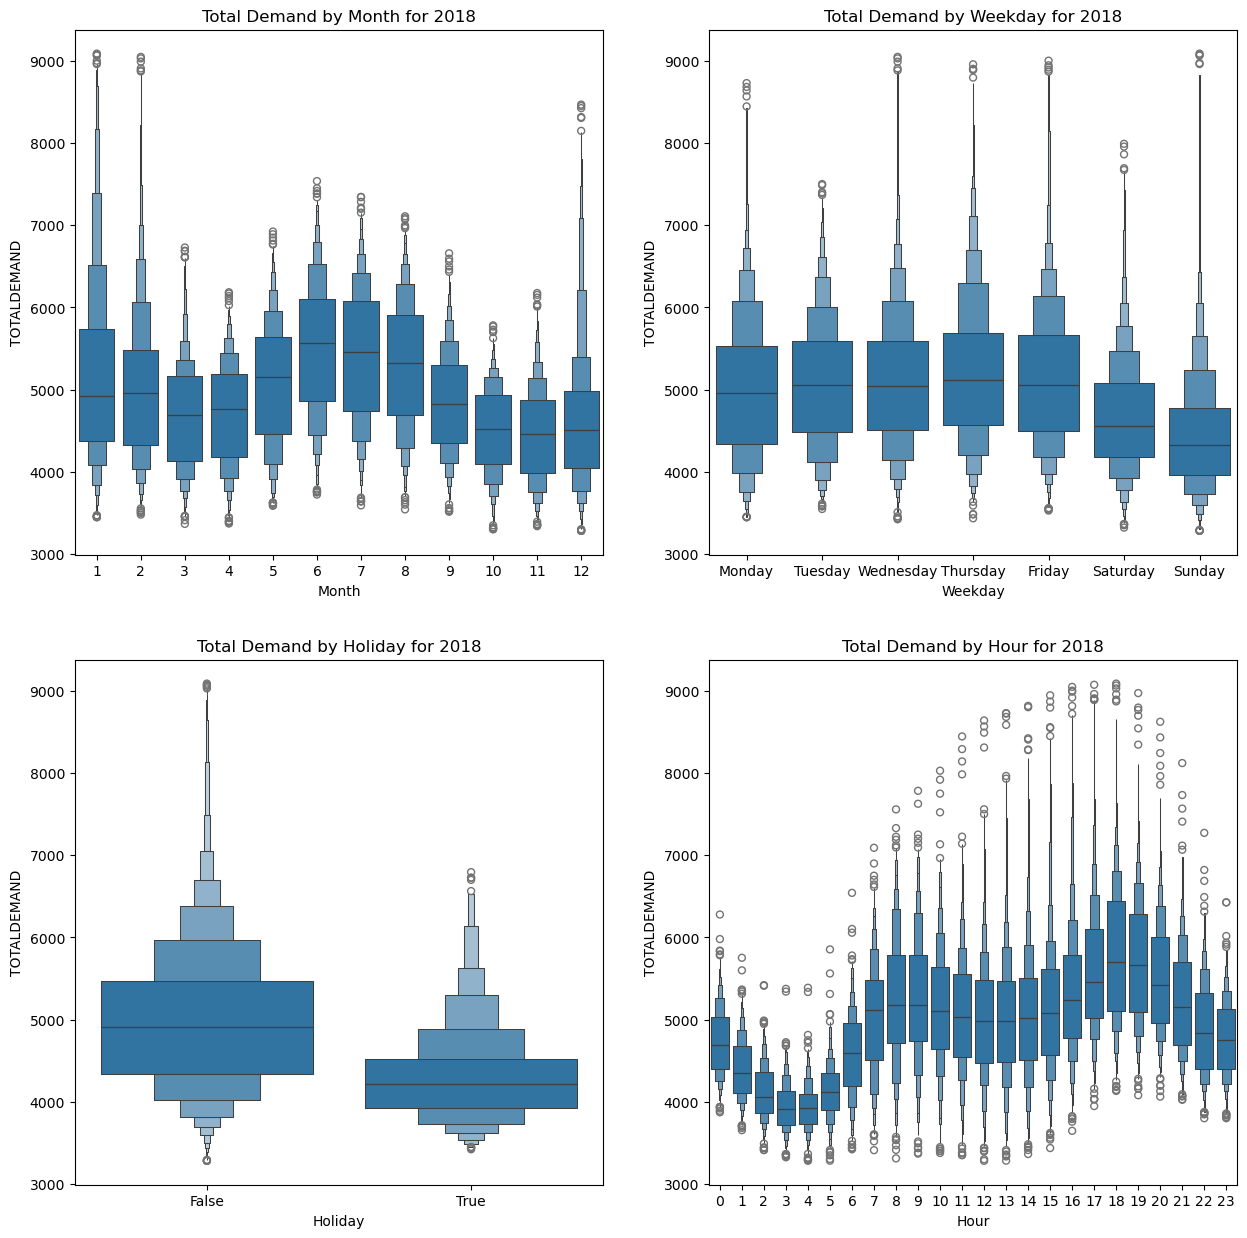

In [21]:
fig,ax = plt.subplots(2,2,figsize=(15,15))

sns.boxenplot(x="Month", y="TOTALDEMAND", data=energy_2018, ax=ax[0,0])
ax[0,0].set_title("Total Demand by Month for 2018")

sns.boxenplot(x="Weekday", y="TOTALDEMAND", data=energy_2018, ax=ax[0,1], order=week)
ax[0,1].set_title("Total Demand by Weekday for 2018")

sns.boxenplot(x="Holiday", y="TOTALDEMAND", data=energy_2018, ax=ax[1,0])
ax[1,0].set_title("Total Demand by Holiday for 2018")

sns.boxenplot(x="Hour", y="TOTALDEMAND", data=energy_2018, ax=ax[1,1])
ax[1,1].set_title("Total Demand by Hour for 2018")